# Slit through focus analysis for SM3 slit alignment 

**Creator :** Fabrice MADEC *(Laboratoire d'astrophysique de Marseille)*

**Editor :** Romain LHOUSSAINE BEN BRAHIM *(Laboratoire d'astrophysique de Marseille)*

**Date :** February 19th, 2021 ***[Closed on March, 3 2021]***

**Data required:** You need to use ics_spsaitActor to perform your sequence,get the data required acquisitions to plot the through focus from the slit, and being able to find the right focus.

    Example : slit throughfocus exptime=6.0 lowBound=-0.5 upBound=1.5 fiber=engbotend nbPosition=10 duplicate=1
    (lowBound and upBound are the ranges of the slit focus)

## 0. Librairies, constants and parameters

### 0.1. Classic librairies

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import os
import datetime
from matplotlib import style

### 0.2. LAM Librairies

In [2]:
# import LAM library for logbook, data analysis...
from pfs.lam.sacFileHandling import Logbook, constructFilelist
import pfs.lam.imageAnalysis as imeas
from pfs.lam.slitFocusAnalysis import *
from pfs.lam.style import colors

### 0.3. Constants & parameters

In [3]:
# Style sheets reference
style.use('ggplot')

In [4]:
# Distance between engtopend & engbotend fibers
CST_DIST_FIBERS = 138.84

In [5]:
smId = 3

In [6]:
imgPath = f"/home/pfs/shared/Pictures/SM{smId}/slitAlign/" # WARNING : You must verify that you are choosing the right SM folder !!

## 1. Downloading Data

### 1.0. Theorical Zeemax data

In [7]:
# Filepath of data model
pmodel = os.environ['LAM_SPS_ANALYSIS_DIR']+"/notebooks/optical/input/slit"
file = 'slit-defParam-Ouverture100-fiber65.csv'

In [8]:
# 1: Loading Zeemax data
zemaxData = pd.read_csv('%s/%s' % (pmodel, file), delimiter=" ")

In [9]:
# 2: Loading Zeemax data for medium fibers
zemaxMidFit = imeas.fitparabola(x=zemaxData.Slitdefocus, y=zemaxData.MidFiber, deg=15, focus='max')

In [10]:
# 3: Loading Zeemax data for extreme fibers
zemaxEndFit = imeas.fitparabola(x=zemaxData.Slitdefocus, y=zemaxData.ExtremeFiber, deg=15, focus='max')

### 1.1. Experimental data

In [11]:
# Loading data from the data base
experiments = pd.read_sql_query('select * from Experiment where type="slitAlignment" order by experimentId desc',
                                con='sqlite:////data/ait/experimentLog-sac.db', index_col='experimentId')

In [12]:
# Data manipulation
experiments['exptime'] = [Logbook.getParameter(experimentId, 'exptime') for experimentId in experiments.index]
experiments['fiber'] = [Logbook.getParameter(experimentId, 'fiber', doRaise=False) for experimentId in experiments.index]

In [13]:
# Display of the 5 last acquisitions made on the SacSequence Panel
experiments.head()

,name,visitStart,visitEnd,type,cmdStr,comments,anomalies,startdate,cmdError,exptime,fiber
experimentId,,,,,,,,,,,
468,SM3_Slit_Alignment,14437,14496,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",halogen mask 125mm,,2021-03-02T10:12:33,,4.0,scibotend
467,SM3_Slit_Alignment,14377,14436,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",halogen mask 125mm,,2021-03-02T09:48:42,,4.0,scibotmid
466,SM3_Slit_Alignment,14317,14376,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",halogen mask 125mm,,2021-03-02T09:24:40,,4.0,scitopmid
465,SM3_Slit_Alignment,14257,14316,slitAlignment,"spsait slit align exptime=4.0 position=-1.5,2....",halogen mask 125mm,,2021-03-02T09:00:35,,4.0,scitopend
464,SM3_Slit_Alignment,14181,14240,slitAlignment,"spsait slit align exptime=1.0 position=-1.5,2....",halogen mask 125mm,,2021-02-19T10:36:38,,1.0,engbotend


## 2. Data Analysis

### 2.1. Input Parameters : 

The only parameters needed is the experimentIds that match your data acquisition sequence.

In [14]:
#All the experiment Ids used for SM3 slit Alignement

# First analysis on engineering fibers
#experimentIds = [447,448,449,450]     # Ids needed for the slit through focus analysis

# Second analysis on engineering fibers : after the first correction
experimentIds = [461,462,463,464]     # Ids needed for the slit through focus analysis

# Analysis on scientific fibers to confirm the correction
#experimentIds = [465,466,467,468]     # Ids needed for the slit through focus analysis

In [15]:
com           = True                  #
doBck         = True                  #
corrector     = False                 #
doSave        = True                  # Parameter that allow to save the through slit focus on the distant computer 
head          = 0                     #
tail          = 0                     #
dfs           = []                    #
#bck_expId     = 260                   #

In [16]:
threshold = 300                   #
radius = 60                       #
doPrint = False                   #
doPlot = False                    #
roi_size = 150                    #


In [17]:
fwhm_radius = radius              #
fwhm_method = 'gaussian'          #

In [18]:
vline = True
plotModel = True
index = 'fca_x'

In [19]:
criteria = 'EE20'
EE = 20
if criteria == 'EE40' :
    EE      = 40

In [20]:
thres_neighbor = -0.1
doNeighborFilter = True

### 2.2. Compile the maximum brightness according to the focus's displacement

peak has not been properly detected
peak has not been properly detected
peak has not been properly detected
peak has not been properly detected


/software/drp/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/scipy/optimize/minpack.py:447: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


peak has not been properly detected
peak has not been properly detected
peak has not been properly detected
peak has not been properly detected
peak has not been properly detected


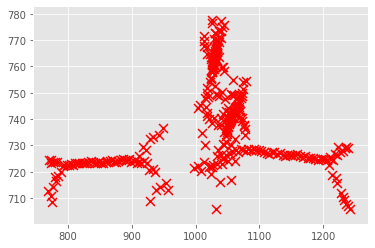

In [21]:
for experimentId in experimentIds:
    visitStart, visitEnd = Logbook.visitRange(experimentId=experimentId)
    filelist = constructFilelist(visitStart=visitStart, visitEnd=visitEnd)
    duplicate = int(Logbook.getParameter(experimentId=experimentId, param='duplicate'))
    filelist = filelist[head*duplicate:len(filelist)-tail*duplicate]
    guessedPos = getSlitPosFromMove(experimentId)
    fiberId = Logbook.getParameter(experimentId, 'fiber', doRaise=False)

    res = []
    for i in range(len(filelist) // duplicate):
        hdr, data = stackedImage(filelist=filelist, ind=i, duplicate=duplicate, doBck=doBck)
        
        if doPlot:
            plt.imshow(data, origin = 'lower', cmap = 'gray', vmin=300, vmax=800)
        
        calc = iqcalc.IQCalc(None)
        peaks = calc.find_bright_peaks(data, threshold=threshold, radius=radius)
        objlist = calc.evaluate_peaks(peaks, data, fwhm_radius=radius, cb_fn=None, ev_intr=None, fwhm_method='gaussian')
        
        if doPrint: 
            print(len(objlist))

        objlist = [elem for elem in objlist if (elem['fwhm'] > 15)
                                            and (elem['fwhm_x'] > 15) 
                                            and (elem['fwhm_y'] > 15)
                                            and (0 < elem['objx'] < 1940)
                                            and (0 < elem['objy'] < 1460)
                                            and (threshold < elem['brightness'] < 50000)]
        
        for obj in objlist :
            plt.scatter(obj['oid_x'],obj['oid_y'],s=80,c='red',marker='x',label='peak', edgecolors=None)
        
        if doPlot:
            plt.show()

        if doPrint: 
            print(f"Object detected after filtering: {len(objlist)}")
        
        if not objlist:
            print('peak has not been properly detected')
            obj ={"px": np.nan,
                  "py": np.nan,
                  "oid_x": np.nan,
                  "oid_y": np.nan,
                  "EE20" : np.nan
                 }
            dict(obj)
        
        else:
            maxi = np.nanargmax([imeas.getEE(image=data, cx=peak['oid_x'], cy=peak['oid_y'], ee_size=EE, roi_size=300)[0] for peak in objlist])
            cx = objlist[maxi]['oid_x']
            cy = objlist[maxi]['oid_y']

            peak = imeas.getPeakData(data, cx, cy, EE=[EE], roi_size=roi_size, doPlot=False, com=com, fwhm_radius=fwhm_radius, fwhm_method=fwhm_method)
            peak['experimentId'] = experimentId
            peak['fiber'] = fiberId

            try:
                fca_x = hdr['FCA_X']

            except KeyError:
                fca_x = guessedPos[i]

            peak['fca_x'] = fca_x
            res.append(peak)

            if doPlot:
                plt.show()

            if doPrint:
                print("\n")

            df = pd.DataFrame(res)
    
    dfs.append(df)

cube = pd.concat(dfs)

## 3.Compiling the focus Model

In [22]:
if doNeighborFilter :
    cube2 = imeas.neighbor_outlier_filter(cube,"EE20",thres_neighbor, absolute=True)


In [23]:
def fitFocusData(cube, corrector=False, doPlot=False, index='fca_x', criteria = 'EE20'):
    thfoc_data = []
    
    for experimentId, series in cube.groupby('experimentId'):
        series = series.dropna()
        thfoc = getFocus(series, criteria, index, corrector=corrector)
#        for criteria in ['brightness', 'fwhm']:
#            thfoc[criteria] = getFocus(series, criteria, index, corrector=corrector)[criteria]

        thfoc['px'] = np.interp(thfoc[index], series[index], series['px'])
        thfoc['py'] = np.interp(thfoc[index], series[index], series['py'])
        thfoc['experimentId'] = experimentId
        thfoc['fiber'] = series['fiber'].unique()[0]

        thfoc_data.append(thfoc)
        
    thfoc_data = pd.concat(thfoc_data)

    if doPlot:
        kwargs = dict(grid=True, figsize=(14,10), legend=True, subplots=True)
#        criterias = ['EE20', 'brightness', 'fwhm']
        criterias = [criteria]
        
        for experimentId, fit in thfoc_data.groupby('experimentId'):
            raw = cube.query("experimentId==%d"%(experimentId))
            axes = fit.set_index(index)[criterias].plot(**kwargs)
            for i, criteria in enumerate(criterias):
                axes[i].plot(raw[index].values, raw[criteria].values, 'o')
                
    return thfoc_data

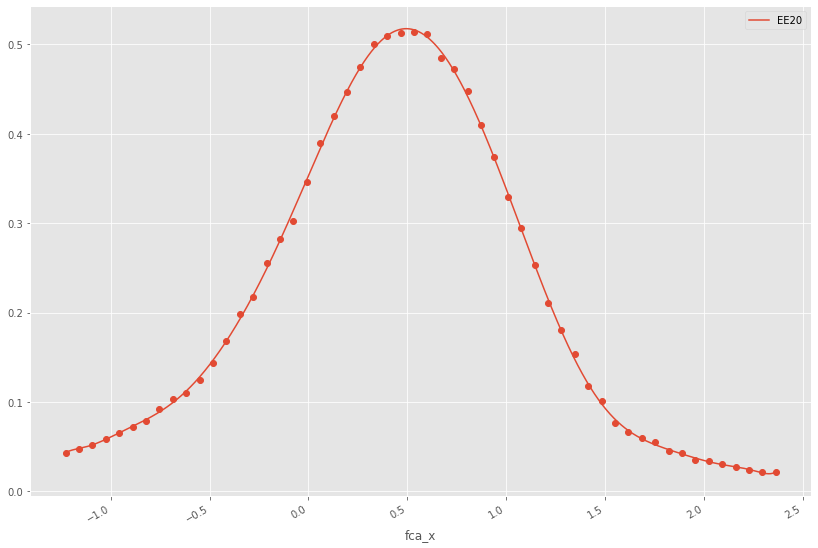

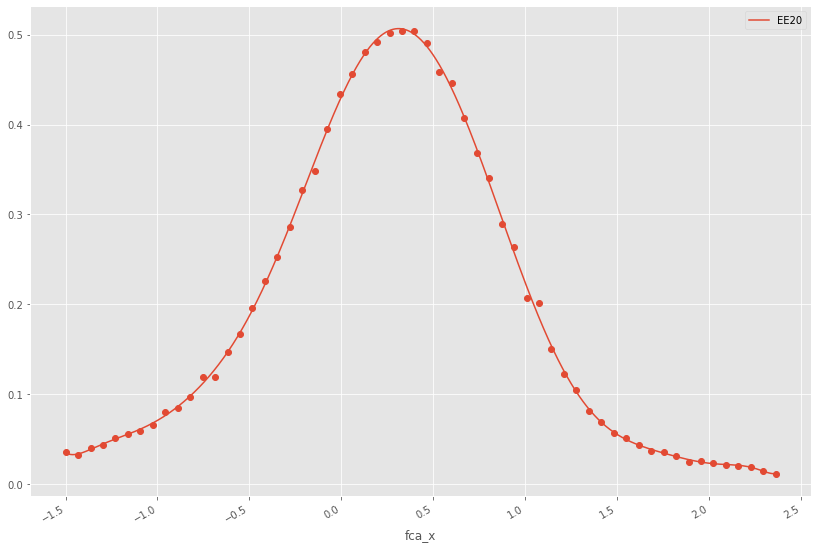

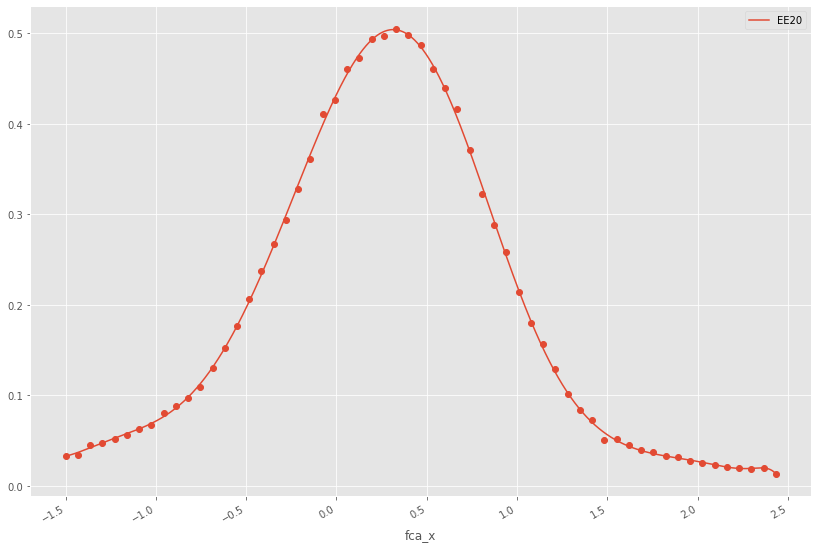

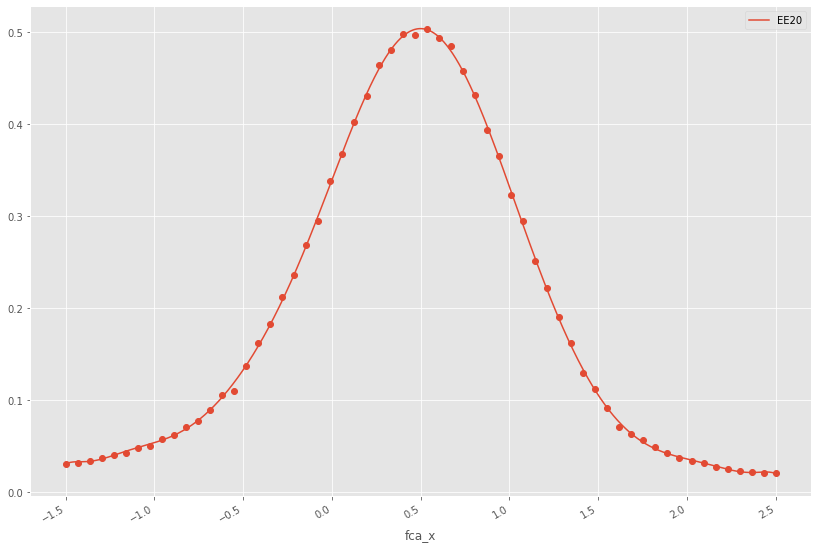

In [24]:
thfocModel= fitFocusData(cube2[cube2.EE20_nbh_flag], corrector=False, doPlot=True, criteria = criteria)

In [25]:
def getFocusModel(fitdata, index='fca_x'):
    data = []
    for experimentId, series in fitdata.groupby('experimentId'):
        series = series.dropna()
        fiber = series['fiber'].unique()[0]
#        for criteria in ['EE20', 'brightness', 'fwhm']:
        for i in [criteria]:

            ixmax = series[i].idxmax() if criteria !='fwhm' else series[i].idxmin()
            focus = series[index][ixmax]
            px = series.px[ixmax]
            py = series.py[ixmax]
            mat = [experimentId, i, px, py, focus, fiber]
            data.append(tuple(mat))
    
    return pd.DataFrame(data, columns=['experimentId', 'criteria', 'px', 'py', index,'fiber'])

In [26]:
focusModel = getFocusModel(thfocModel)

## 4. Tilt & Focus determination

### 4.1. Tilt determination

In [27]:
# 1 : Computing position difference between both extreme fibers
[tilt_ry] = focusModel.fca_x[focusModel.fiber.str.match('\w{3}botend')==True].values - focusModel.fca_x[focusModel.fiber.str.match('\w{3}topend')==True].values

# 2 : Computing tilt on y axis (rad)
angle=np.arctan(tilt_ry/CST_DIST_FIBERS)

# 3 : Converting in degrees
angle_degre=(angle*180)/(np.pi)

print("There is a tilt of",angle_degre, "degrees")

There is a tilt of 0.001790695288522791 degrees


### 4.2. Focus determination

In [28]:
[focus_adjustment] = focusModel.fca_x[focusModel.fiber.str.match('\w{3}botmid')==True].values - focusModel.fca_x[focusModel.fiber.str.match('\w{3}topmid')==True].values
print("You have to adjust the focus by",focus_adjustment, "milimeters")

You have to adjust the focus by 0.002294067406740874 milimeters


## 5. Slit through focus of the framed energy

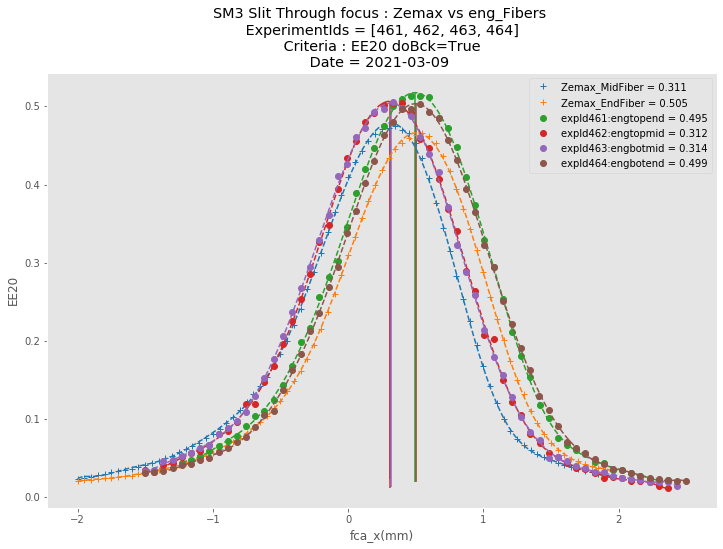

In [29]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
j=2

if criteria == 'EE20' and plotModel:
    ax1.plot(zemaxData.Slitdefocus, zemaxData.MidFiber, '+', color=colors[0], label='Zemax_MidFiber = %.3f' % zemaxMidFit.focus)
    ax1.plot(zemaxMidFit.x, zemaxMidFit.y, '--', color=colors[0])
    if vline:
        ax1.vlines(color=colors[0], **zemaxMidFit.vline)

    ax1.plot(zemaxData.Slitdefocus, zemaxData.ExtremeFiber, '+', color=colors[1], label='Zemax_EndFiber = %.3f' % zemaxEndFit.focus)
    ax1.plot(zemaxEndFit.x, zemaxEndFit.y, '--', color=colors[1])
    if vline:
        ax1.vlines(color=colors[1], **zemaxEndFit.vline)

for experimentId, df in cube2[cube2.EE20_nbh_flag].groupby('experimentId'):
    fit = thfocModel.query("experimentId==%d"%(experimentId))
    focus = focusModel.query("experimentId==%d and criteria=='%s'"%(experimentId, criteria))
    
    ax1.plot(df[index], df[criteria], 'o', color=colors[j], 
             #label='expId%d = %.3f' % (experimentId, experiments.fiber[experimentId]))
             label='expId%d:%s = %.3f' % (experimentId, experiments.fiber[experimentId], focus[index]))

    ax1.plot(fit[index], fit[criteria], '--', color=colors[j])
    
    if vline:
        ax1.vlines(x=focus[index], ymin=fit[criteria].min(), ymax = fit[criteria].max(), color=colors[j])
    j+=1

    
lns = [line for i, line in enumerate(ax1.get_lines()) if not i % 2]
labs = [line.get_label() for line in lns]

ax1.legend(lns, labs)
ax1.set_xlabel('%s(mm)'%index)
ax1.set_ylabel(criteria)

plt.title('%s Slit Through focus : Zemax vs %s_Fibers \n ExperimentIds = %s \n Criteria : %s doBck=%s \n Date = %s  ' %(imgPath[26:29],str(focusModel.fiber[0][:3]),experimentIds,criteria,doBck,datetime.date.today()))
plt.grid()

In [30]:
if doSave : 
    fig.savefig(imgPath+f"Slit_Through_focus_SM{smId}_{focusModel.fiber[0][:3]}_Exp{experimentIds}_{datetime.date.today()}.png") 